<a href="https://colab.research.google.com/github/Akshara05-thv/ARTIFICIAL_INTELIIGENCE_AND_MACHINE_LEARNING/blob/main/market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics


In [40]:
import warnings
warnings.filterwarnings("ignore")


In [41]:
df = pd.read_csv('/content/mcdonalds (1).csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [42]:
df.shape

(1453, 15)

Checking for null values

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [44]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [45]:
df.isnull().sum()


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [46]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

22

In [47]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [48]:
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


#check NaN values

In [49]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [50]:
df.Age.describe([.75,.90,.95,.99])

count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
50%        45.000000
75%        57.000000
90%        63.000000
95%        66.000000
99%        70.000000
max        71.000000
Name: Age, dtype: float64

<Axes: title={'center': 'distribution of yummy'}, xlabel='Age'>

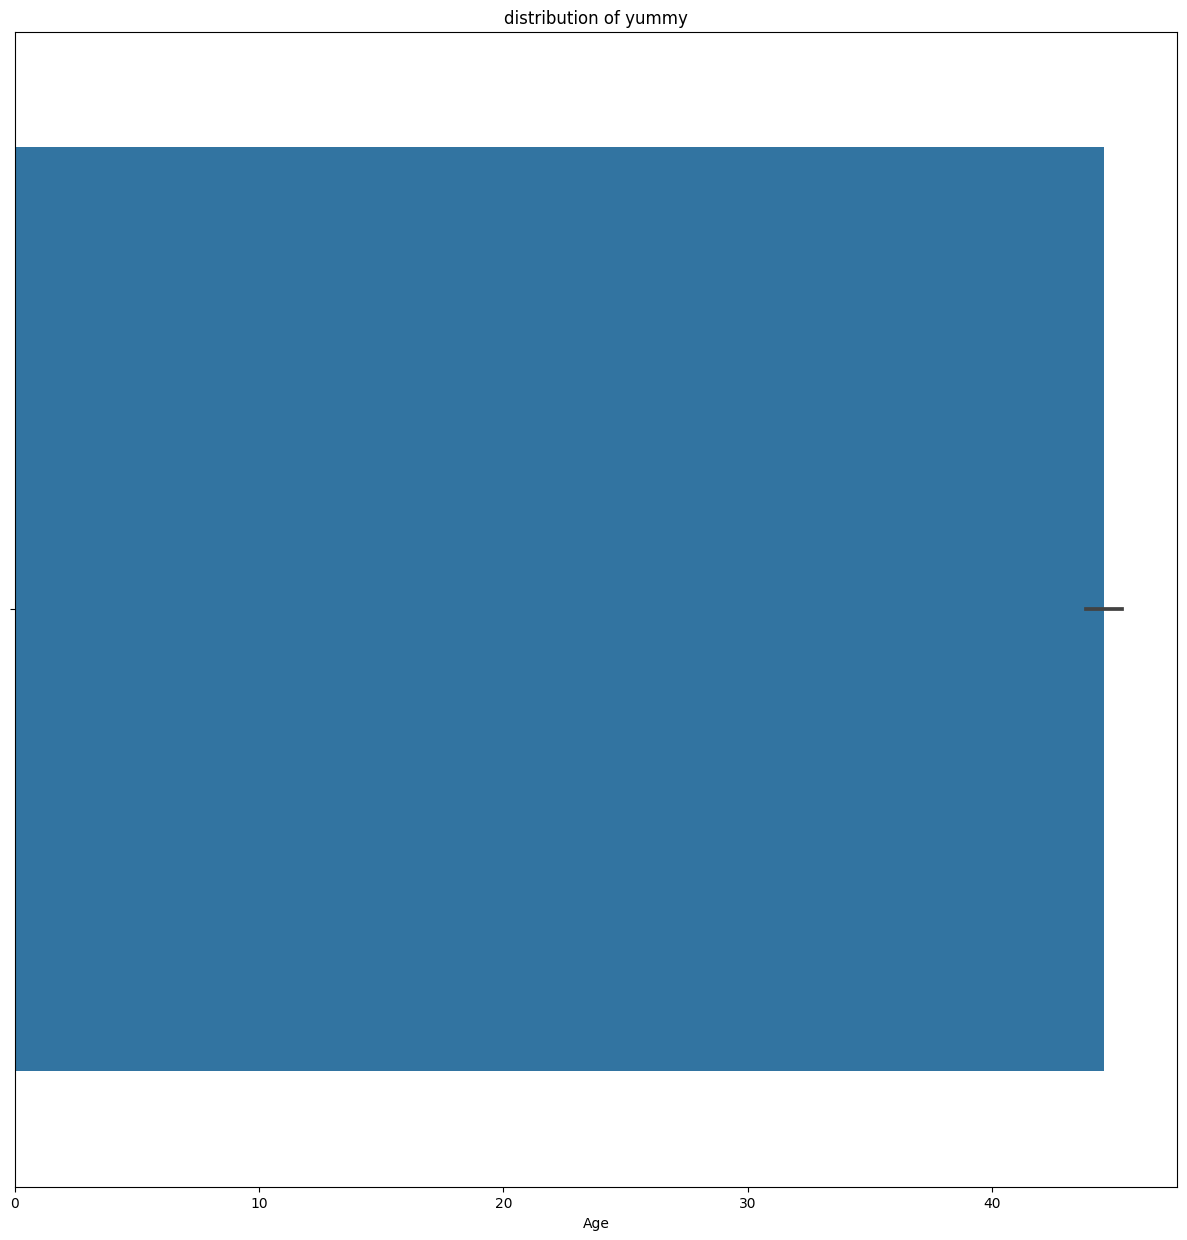

In [51]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.title('distribution of yummy')
sns.barplot(x='Age',data=df)

<Axes: title={'center': 'Distribution of Age'}, xlabel='Age', ylabel='Density'>

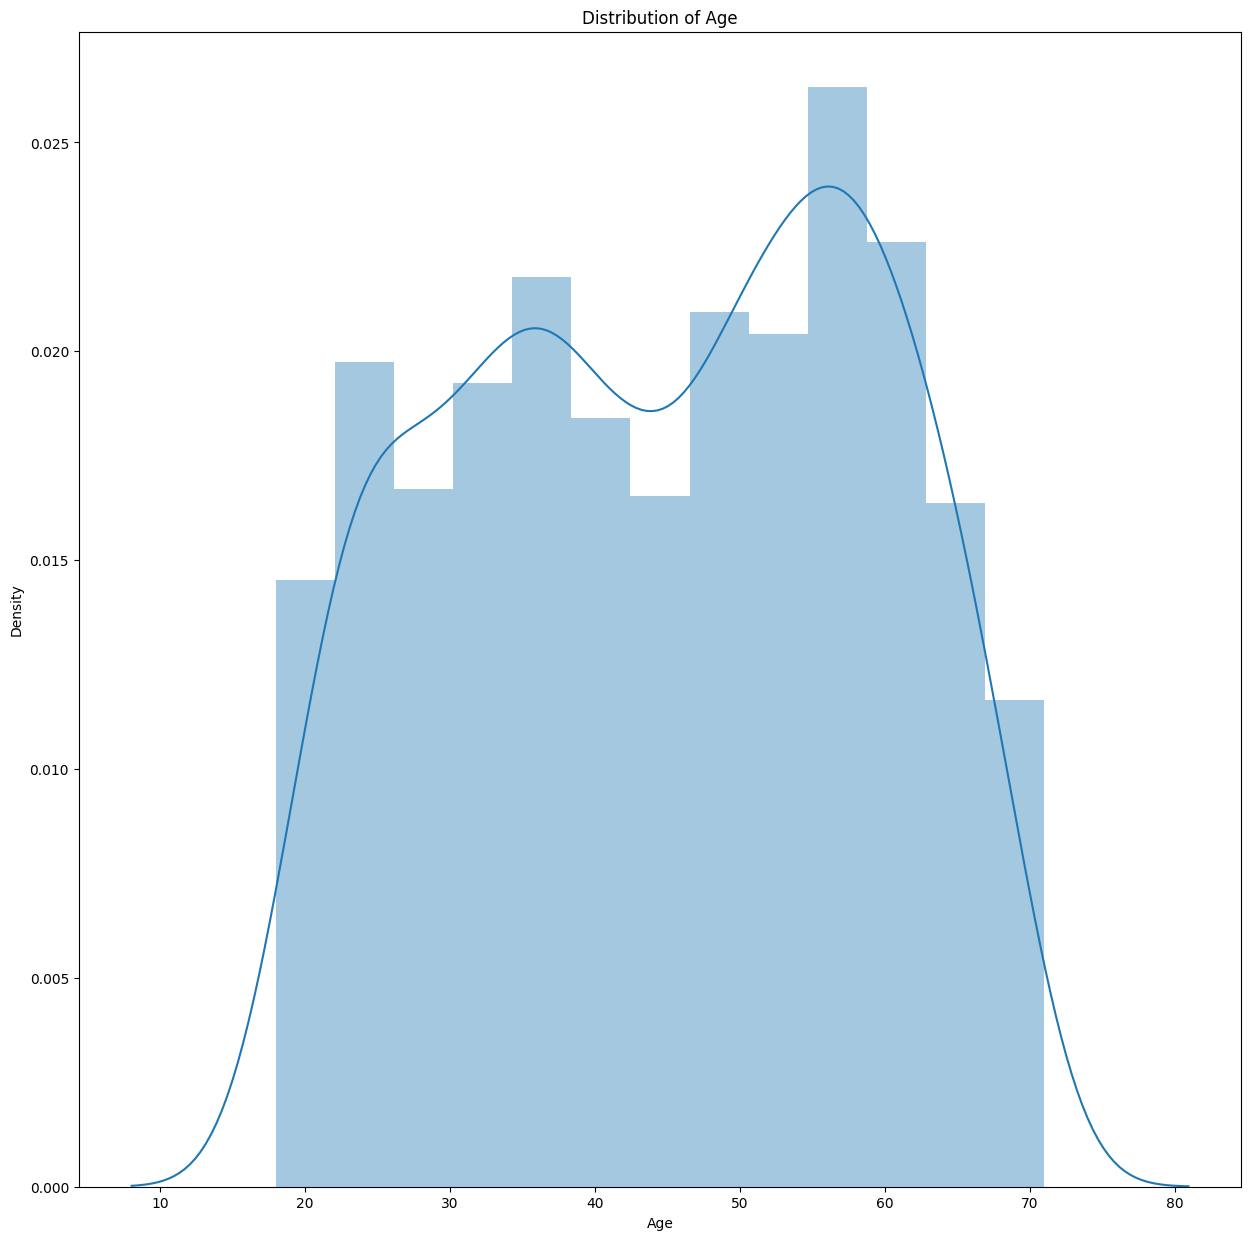

In [52]:
# Distribution of Age
plt.figure(figsize=(15,15))
plt.title("Distribution of Age")
sns.distplot(df['Age'])

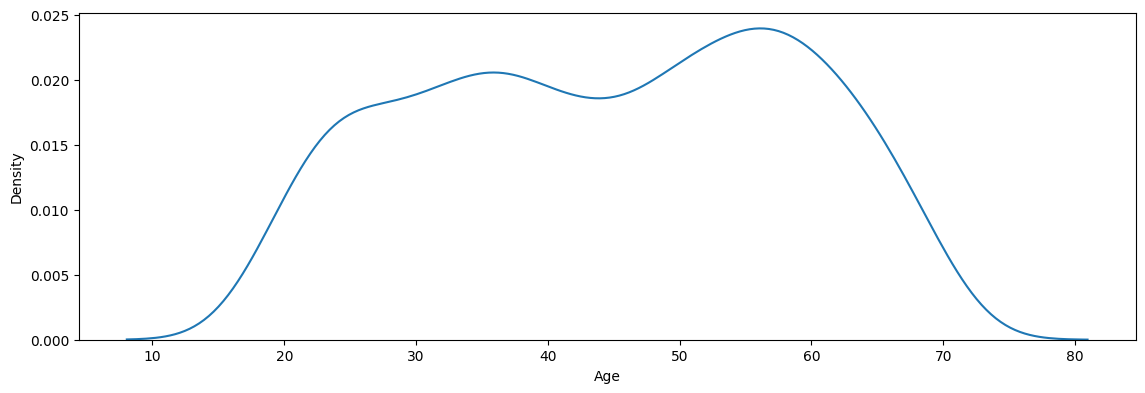

In [53]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

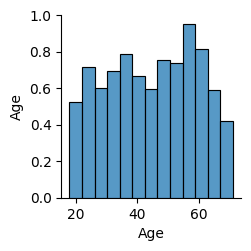

In [54]:
sns.pairplot(df)

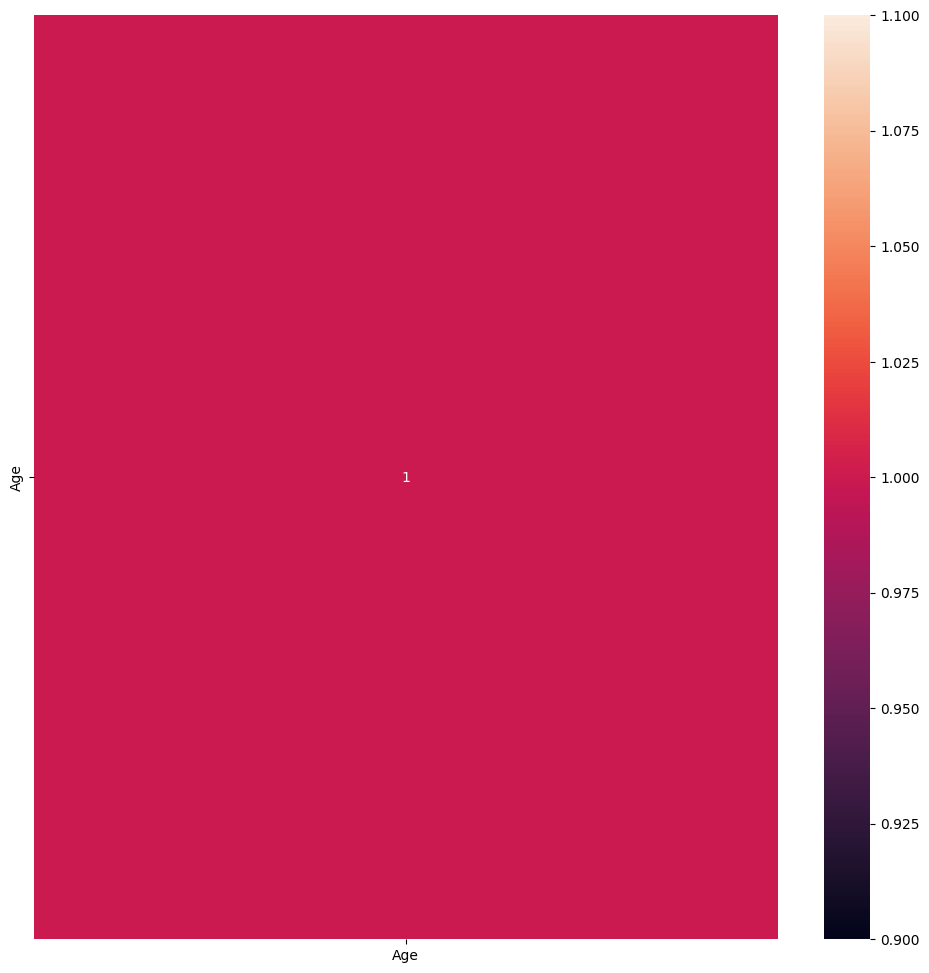

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["yummy"]=le.fit_transform(df["yummy"])
df["convenient"]=le.fit_transform(df["convenient"])
df["spicy"]=le.fit_transform(df["spicy"])
df["fattening"]=le.fit_transform(df["fattening"])
df["greasy"]=le.fit_transform(df["greasy"])
df["fast"]=le.fit_transform(df["fast"])
df["cheap"]=le.fit_transform(df["cheap"])
df["tasty"]=le.fit_transform(df["tasty"])
df["expensive"]=le.fit_transform(df["expensive"])
df["healthy"]=le.fit_transform(df["healthy"])
df["disgusting"]=le.fit_transform(df["disgusting"])
df["Like"]=le.fit_transform(df["Like"])
df["Age"]=le.fit_transform(df["Age"])
df["VisitFrequency"]=le.fit_transform(df["VisitFrequency"])
df["Gender"]=le.fit_transform(df["Gender"])


In [57]:
from sklearn.model_selection import train_test_split
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,43,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,44,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,51,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,31,3,1


In [58]:
data = df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Age','Gender']].rename({'Gender':'label'},axis=1)

In [59]:
X = data.iloc[:, data.columns != 'label']
y = data.iloc[:, data.columns == 'label']


In [60]:
# split the data into test and train by maintaing same distribution of output variable 'y_true'[stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)
# split the train data into train and cross calidation by maintaining same distrubution of output varaible 'y_train'[stratify=y_true]
train_df, cv_df, ytrain, y_cv = train_test_split(X_train, y_train,stratify=y_train, test_size=0.2)

In [61]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:',df.shape[0])

Number of data points in train data: 929
Number of data points in test data: 291
Number of data points in cross validation data: 1453


In [62]:
test_df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
638,1,1,0,1,0,1,1,1,0,0,0,25
720,1,1,1,0,0,1,1,1,0,1,0,47


In [63]:
y_test.head(2)

,label
638,0
720,1


In [64]:
scaled_df = scalar.fit_transform(df)

In [67]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,0.765152,-1.047770
1,-0.890747,1.023767
2,-0.185244,0.965064
3,-0.205081,-1.002718
4,-0.130757,-1.195983
...,...,...
1448,3.784114,0.967734
1449,-1.868781,0.331678
1450,-0.718260,1.576742
1451,-2.650853,-0.443766


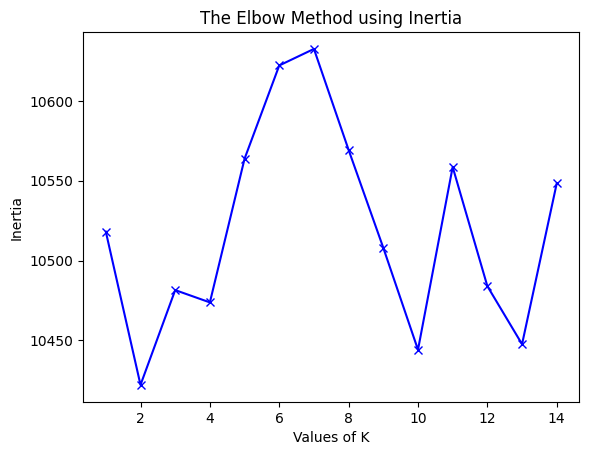

In [68]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kMeans = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()



In [69]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

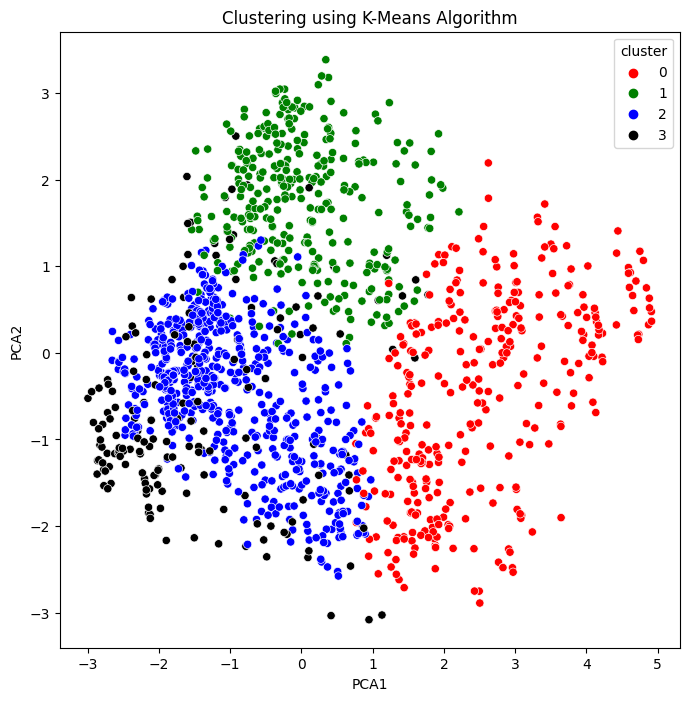

In [70]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [71]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.017857,0.678571,0.077381,9.583333e-01,0.761905,0.779762,0.401786,0.068452,0.538690,0.032738,0.809524,7.345238,30.931548,2.839286,0.502976
1,0.791411,0.978528,0.128834,9.907975e-01,0.625767,0.877301,0.113497,0.861963,0.914110,0.177914,0.134969,3.530675,21.125767,2.472393,0.515337
2,0.673171,0.988618,0.073171,1.000000e+00,0.471545,0.970732,0.938211,0.798374,0.004878,0.186992,0.050407,3.759350,25.546341,2.647154,0.388618
3,0.710227,0.931818,0.130682,1.665335e-15,0.085227,0.926136,0.687500,0.801136,0.215909,0.596591,0.034091,4.579545,32.193182,2.528409,0.505682


In [72]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,6,43,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,0,44,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,3,51,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,1,31,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,29,5,1,0
1449,1,1,0,1,0,0,1,1,0,1,0,1,18,4,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,2,34,3,0,1
1451,1,1,0,0,0,1,1,1,0,1,0,3,23,0,1,3


In [73]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,6,43,0,0,0
8,0,0,0,1,1,0,0,0,1,0,1,9,40,5,1,0
10,0,1,0,1,0,1,1,0,0,0,1,5,35,0,0,0
14,0,1,0,1,0,1,0,0,1,0,0,6,49,3,1,0
18,0,0,0,1,1,1,1,0,1,0,1,7,29,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0,1,0,1,1,1,1,0,1,0,1,6,24,4,1,0
1433,0,0,0,0,0,0,0,0,1,0,1,9,26,5,1,0
1435,0,1,0,1,1,1,1,0,0,0,1,9,7,2,1,0
1448,0,1,0,1,1,0,0,0,1,0,1,9,29,5,1,0


In [74]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,0,44,0,0,1
6,1,1,1,1,0,1,0,1,1,1,0,1,38,0,0,1
9,1,1,0,1,1,1,0,1,1,0,0,0,14,0,0,1
11,1,1,0,1,1,1,0,1,1,0,1,2,10,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1,1,0,1,1,1,0,1,1,0,0,10,6,3,1,1
1438,1,1,0,1,1,1,0,1,1,0,0,2,9,3,0,1
1441,1,1,0,1,1,1,0,1,1,0,0,10,11,4,1,1
1447,0,1,0,1,1,0,0,1,1,0,0,8,25,3,1,1


In [75]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
3,1,1,0,1,1,1,1,1,0,0,1,3,51,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,1,31,3,1,2
5,1,1,0,1,0,1,1,1,0,0,0,1,37,0,1,2
7,1,1,0,1,1,1,1,1,0,0,0,10,5,4,0,2
12,0,1,0,1,0,1,1,0,0,0,0,8,47,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1,1,0,1,0,1,1,1,0,0,0,1,32,5,0,2
1444,0,1,0,1,1,1,1,0,0,1,0,6,37,2,1,2
1445,0,1,0,1,1,1,1,1,0,0,1,0,0,3,0,2
1446,1,1,0,1,1,1,1,1,0,1,0,0,34,0,0,2


In [76]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
17,1,1,0,0,1,1,0,1,0,0,0,1,13,3,1,3
28,0,1,0,0,0,1,0,0,0,0,0,8,37,0,1,3
31,0,1,0,0,0,1,1,1,0,1,0,2,22,3,0,3
46,0,1,0,0,0,1,0,1,0,1,0,0,36,0,1,3
54,1,1,0,0,0,1,1,1,0,1,0,3,36,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,0,1,1,0,0,1,0,1,0,0,0,3,44,3,0,3
1426,1,0,0,0,0,1,1,1,0,0,0,10,15,3,0,3
1440,1,1,0,0,0,1,1,1,0,0,0,2,37,3,0,3
1442,1,1,0,0,1,1,1,1,0,0,0,3,13,3,1,3


<Axes: xlabel='Cluster', ylabel='count'>

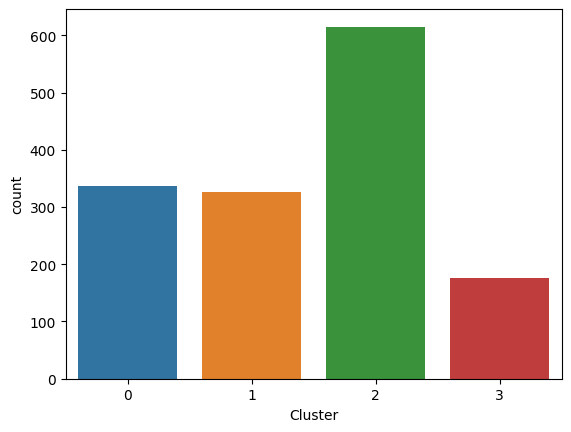

In [77]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

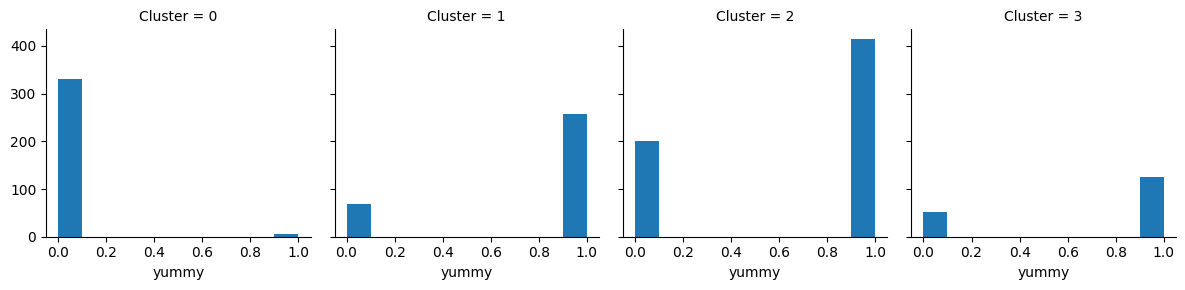

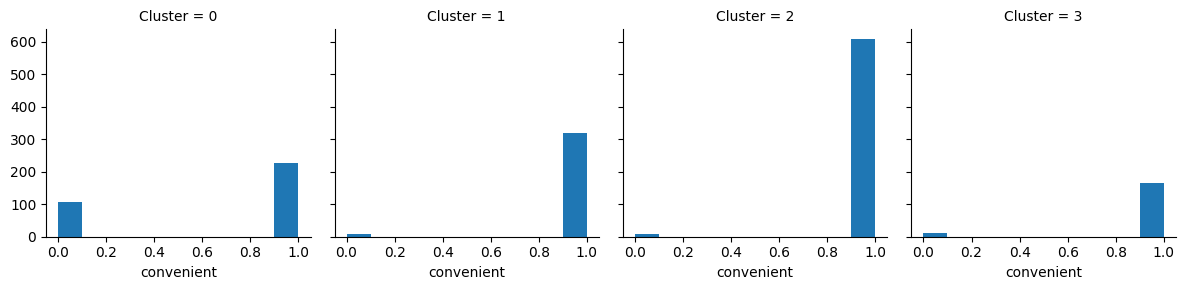

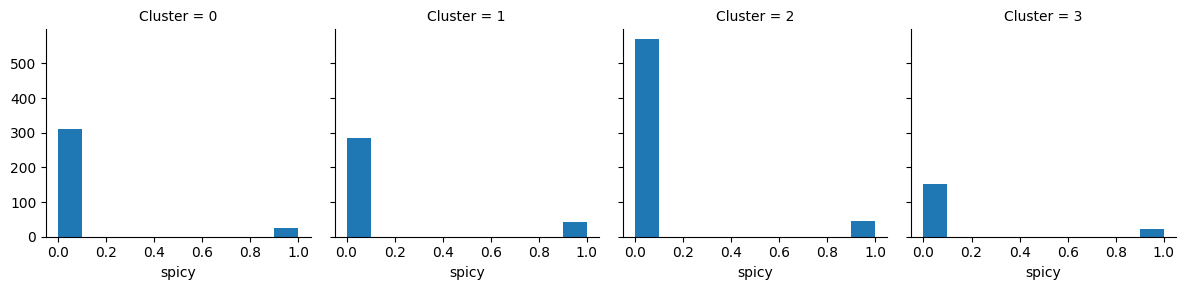

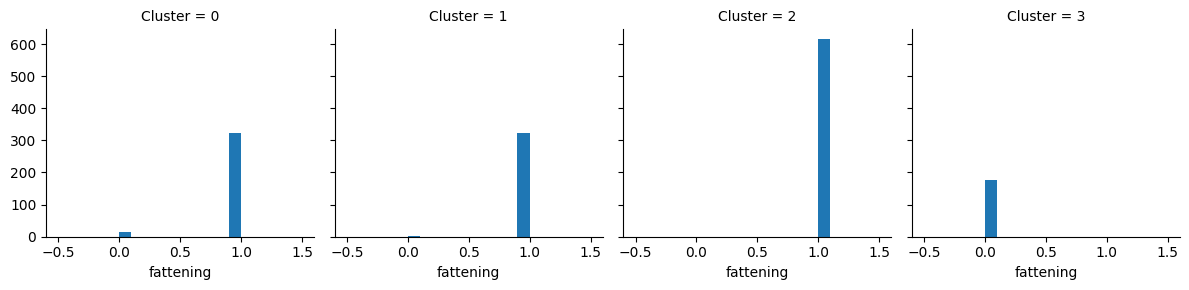

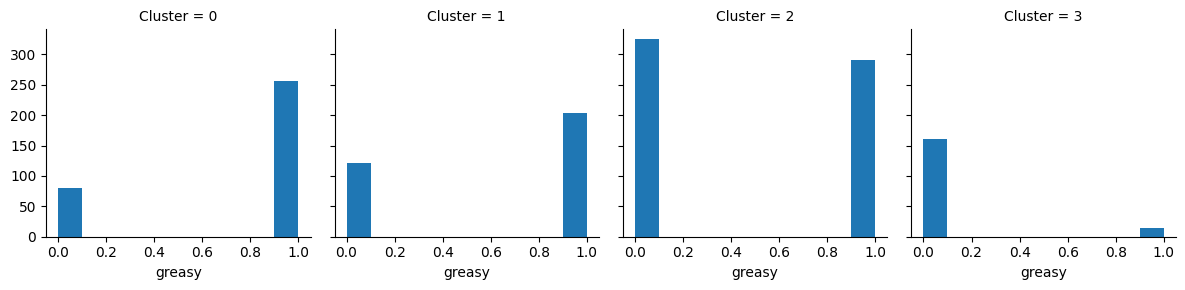

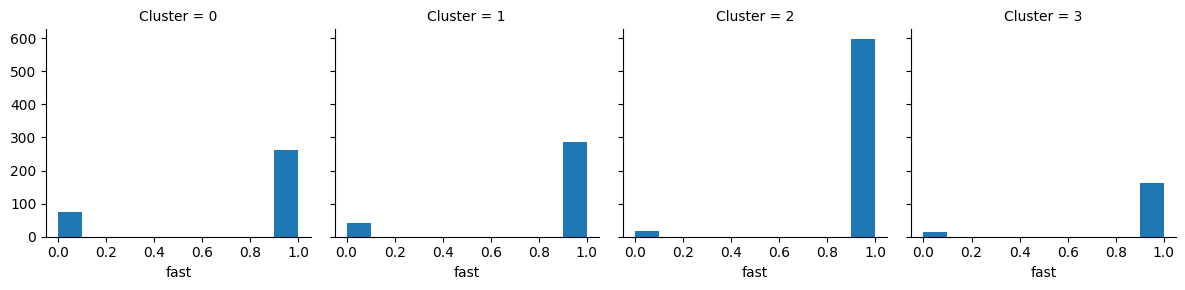

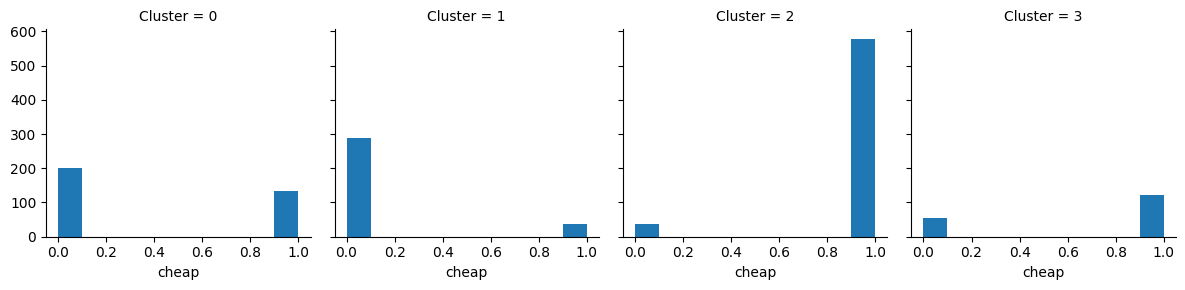

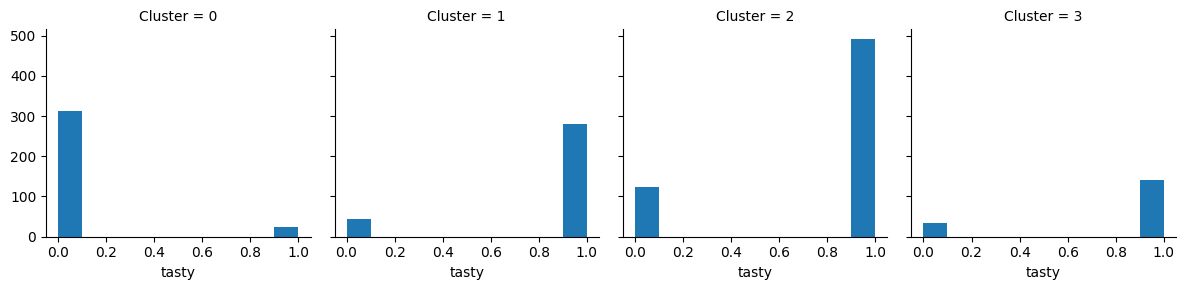

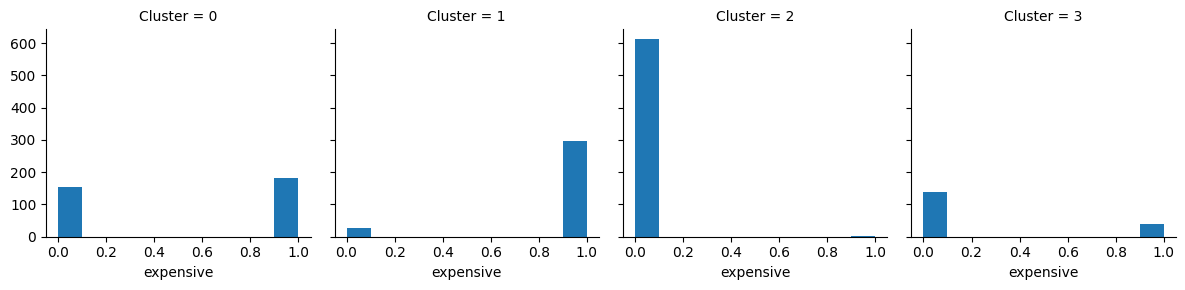

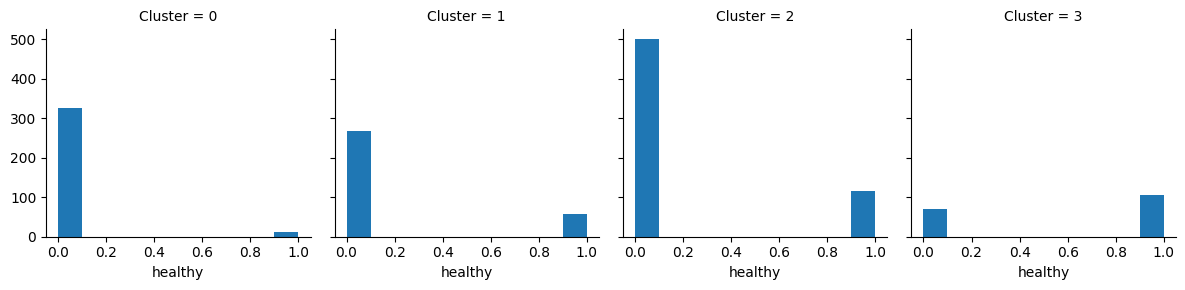

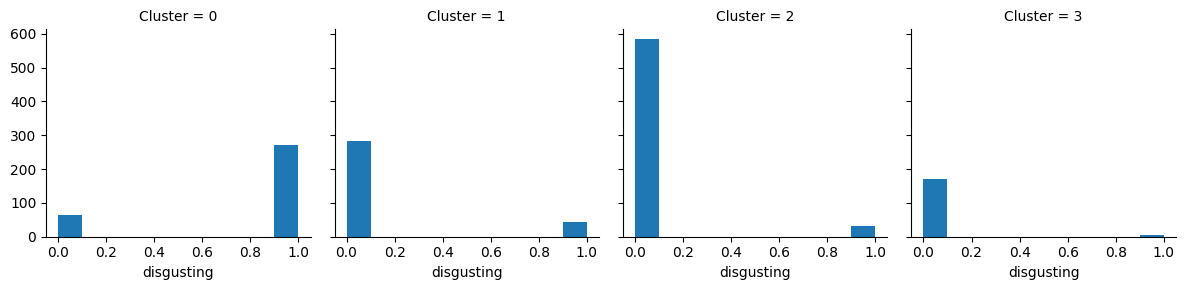

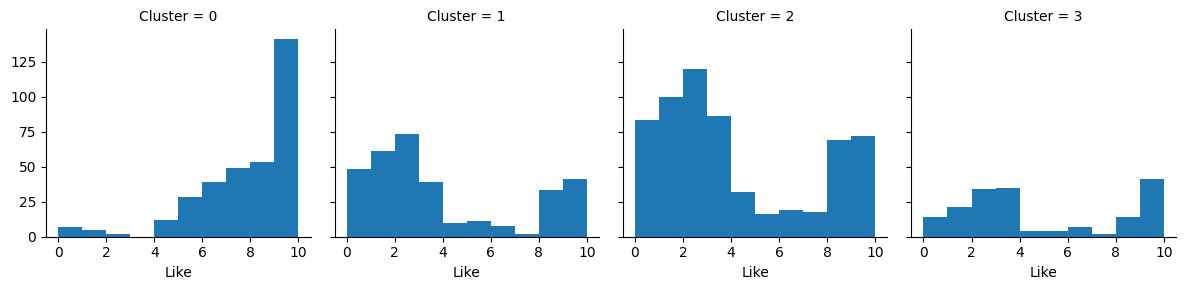

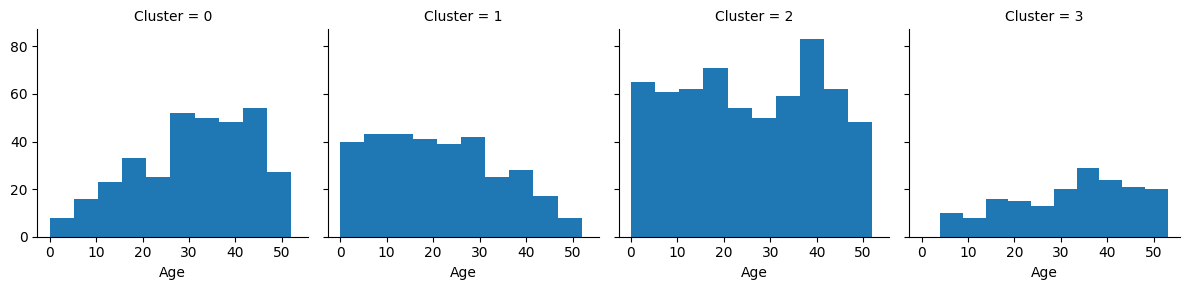

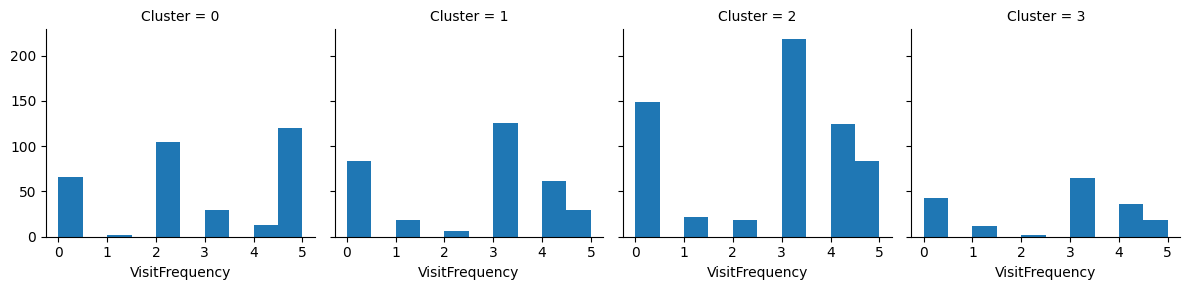

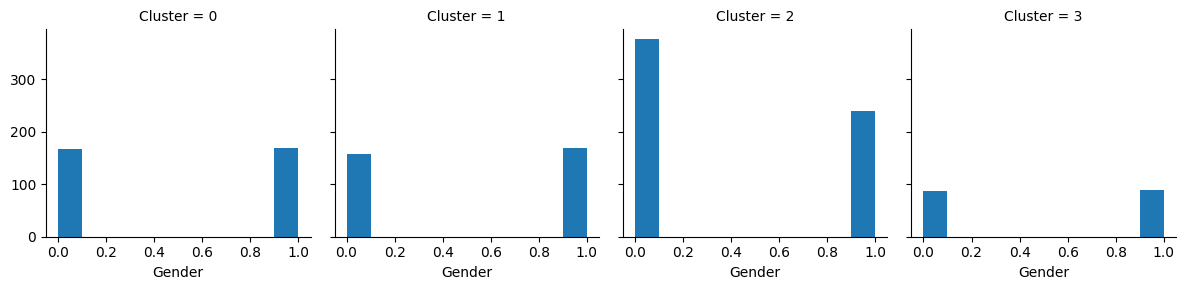

In [78]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [79]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [80]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [81]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [82]:
X_train

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
421,1,1,0,1,1,1,0,1,1,0,0,2,7,3,1
707,1,1,0,1,1,1,1,1,0,0,0,1,41,3,0
1125,0,0,1,1,1,1,1,1,0,0,1,9,40,5,0
1428,0,1,0,1,1,1,1,1,0,0,0,0,19,0,1
105,0,1,0,1,0,1,0,0,1,0,0,2,33,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1,1,0,0,0,1,1,1,0,1,0,2,46,3,0
533,1,1,0,1,0,1,0,1,1,0,0,2,38,5,0
890,0,1,0,1,1,1,0,0,1,0,1,6,44,5,0
839,1,1,0,1,0,1,1,1,0,0,0,3,41,5,0


In [83]:
X_test

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1221,1,1,0,1,1,0,1,1,0,0,0,2,2,3,0
1327,0,1,0,1,1,0,0,0,1,0,1,9,42,2,0
5,1,1,0,1,0,1,1,1,0,0,0,1,37,0,1
306,1,1,0,1,0,1,0,0,1,0,0,1,25,3,0
315,1,1,0,1,0,1,0,1,1,0,0,8,14,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,0,1,0,1,1,0,0,1,0,1,0,8,28,0,0
774,1,1,0,1,0,1,1,1,0,0,0,3,20,3,0
233,0,1,0,1,1,1,1,0,0,0,1,9,32,2,0
1023,1,1,0,1,0,1,1,1,0,0,0,1,33,0,0


In [84]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 91   2   1   4]
 [  5  95   3   1]
 [  3   0 182   0]
 [  2   0   0  47]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        98
           1       0.98      0.91      0.95       104
           2       0.98      0.98      0.98       185
           3       0.90      0.96      0.93        49

    accuracy                           0.95       436
   macro avg       0.94      0.95      0.94       436
weighted avg       0.95      0.95      0.95       436



In [86]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9518348623853211 % Acuuracy
